# numpy 的高阶函数应用

## Python 的线性代数运算（NumPy）

NumPy 提供了 `numpy.linalg` 模块，包含许多常用的线性代数函数。  
这些函数能够处理矩阵运算、解方程组、求逆、特征值分解等。  
下面我们逐一介绍。

---

### 1. 向量点积（dot product）

数学公式：
$$
\mathbf{a} \cdot \mathbf{b} = \sum_{i=1}^{n} a_i b_i
$$

NumPy 实现：`np.dot(a, b)` 或 `a @ b`
```python
import numpy as np
a = np.array([1, 2, 3])
b = np.array([4, 5, 6])
print(np.dot(a, b))  # 32
```

In [4]:
import numpy as np

a = np.array([1, 2, 3])
b = np.array([4, 5, 6])
print(np.dot(a, b))  # 32

32


### 2. 矩阵乘法（matrix multiplication）

公式：
$$
C = A \times B, \quad c_{ij} = \sum_{k=1}^{n} a_{ik} b_{kj} 
$$

`NumPy` 实现：`np.dot(A, B)` 或 `A @ B`

In [3]:
A = np.array([[1, 2], [3, 4]])
B = np.array([[2, 0], [1, 2]])
print(A @ B)


[[ 4  4]
 [10  8]]


### 3. 矩阵转置（transpose）

公式：
$$ 
(A^T)_{ij} = A_{ji} 
$$

`A.T` 或 `np.transpose(A)`

In [5]:
A = np.array([[1, 2], [3, 4]])
print(A.T)


[[1 3]
 [2 4]]


### 4. 矩阵行列式（determinant）

2×2 矩阵的公式：
$$
\det(A) = 
\begin{vmatrix} a & b \\ c & d \end{vmatrix} 
= ad - bc 
$$

`np.linalg.det(A)`

In [6]:
A = np.array([[1, 2], [3, 4]])
print(np.linalg.det(A))


-2.0000000000000004


### 5. 矩阵逆（inverse）

公式：
$$ 
A^{-1} A = I 
$$

`np.linalg.inv(A)`

### 6. 解线性方程组

公式：
$$ 
A \mathbf{x} = \mathbf{b} 
$$

`np.linalg.solve(A, b)`

In [7]:
A = np.array([[2, 1], [1, 3]])
b = np.array([5, 7])
x = np.linalg.solve(A, b)
print(x)


[1.6 1.8]


### 7. 特征值与特征向量

公式：
$$
A \mathbf{v} = \lambda \mathbf{v} 
$$

`np.linalg.eig(A)`

In [8]:
A = np.array([[4, -2], [1, 1]])
values, vectors = np.linalg.eig(A)
print("特征值:", values)
print("特征向量:\n", vectors)


特征值: [3. 2.]
特征向量:
 [[0.89442719 0.70710678]
 [0.4472136  0.70710678]]


### 8. 奇异值分解（SVD）

公式：
$$
A = U \Sigma V^T 
$$

`np.linalg.svd(A)`

In [9]:
A = np.array([[1, 2], [3, 4], [5, 6]])
U, S, Vt = np.linalg.svd(A)
print("U:\n", U)
print("S:", S)
print("V^T:\n", Vt)


U:
 [[-0.2298477   0.88346102  0.40824829]
 [-0.52474482  0.24078249 -0.81649658]
 [-0.81964194 -0.40189603  0.40824829]]
S: [9.52551809 0.51430058]
V^T:
 [[-0.61962948 -0.78489445]
 [-0.78489445  0.61962948]]


### 总结

- `np.dot` / `@`：点积与矩阵乘法

- `A.T`：转置

- `np.linalg.det`：行列式

- `np.linalg.inv`：逆矩阵

- `np.linalg.solve`：解线性方程组

- `np.linalg.eig`：特征值与特征向量

- `np.linalg.svd`：奇异值分解

---

## NumPy 随机数与蒙特卡洛模拟

NumPy 提供了 `np.random` 模块，支持生成多种随机数分布。在计算物理与数据分析中，随机数常用于模拟实验、数值积分和蒙特卡洛方法。



### 1. 均匀分布（Uniform Distribution）

均匀分布表示在区间 `[low, high)` 内，随机数出现的概率相等。

公式：

$$
X \sim U(a, b), \quad P(x) = \frac{1}{b-a}, \; x \in [a, b]
$$


In [13]:
%matplotlib inline

%config InlineBackend.figure_format = 'retina'

In [15]:
import matplotlib
matplotlib.rcParams.update({'font.size': 14, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})

In [19]:
matplotlib.rcParams['figure.facecolor'] = 'white'   # 图背景
matplotlib.rcParams['savefig.facecolor'] = 'white' # 保存背景


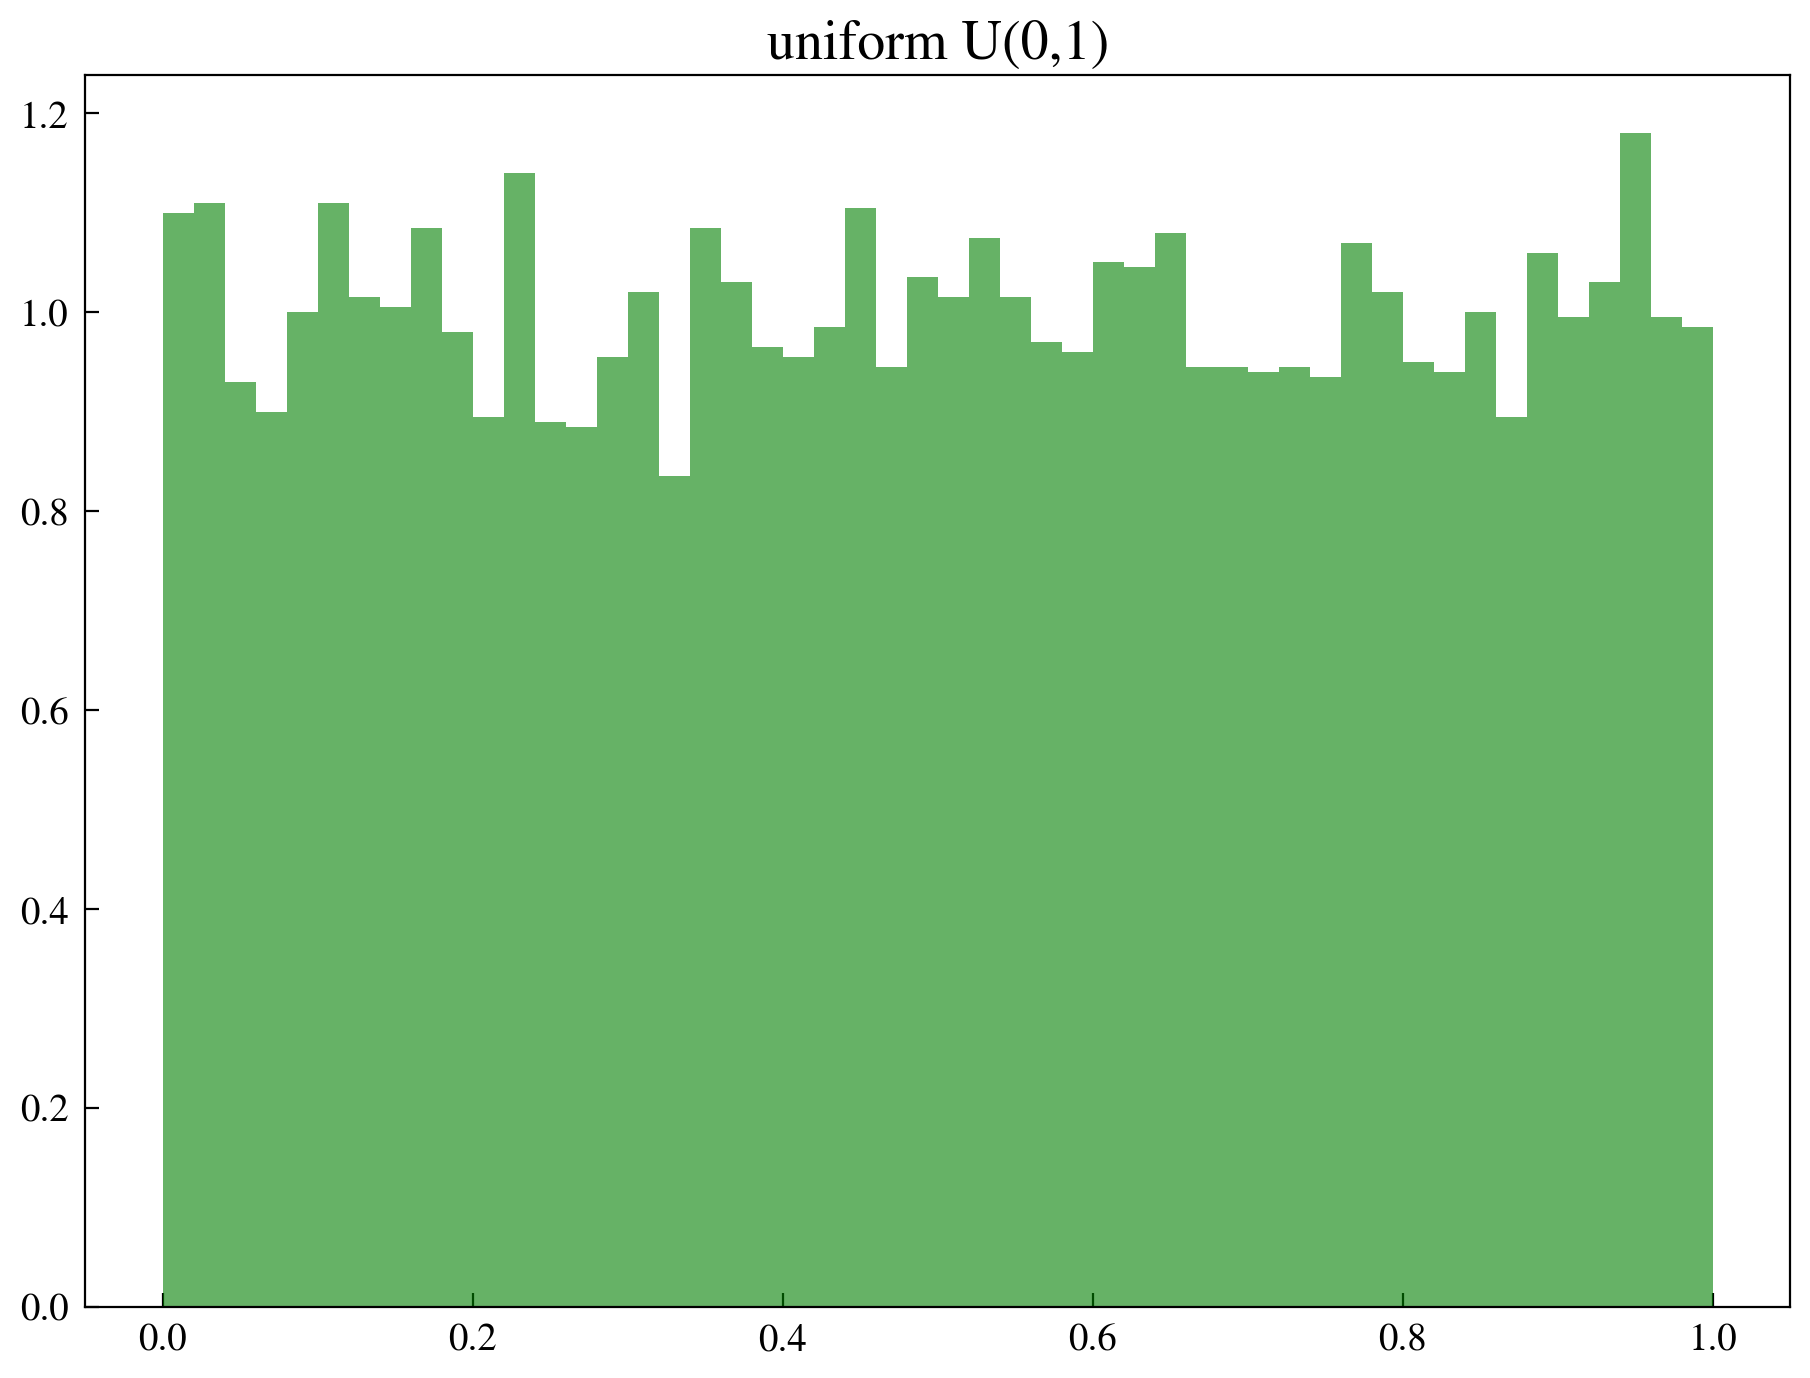

In [20]:
#import numpy as np
import matplotlib.pyplot as plt

data = np.random.uniform(0, 1, 10000)

plt.hist(data, bins=50, density=True, alpha=0.6, color='g')
plt.title("uniform U(0,1)")
plt.show()

### 2 正态分布（Normal / Gaussian Distribution）

正态分布由均值 $\mu$ 和标准差 $\sigma$ 决定。

$$
X \sim N(\mu, \sigma^2), \quad f(x) = \frac{1}{\sqrt{2 \pi} \sigma} e^{-\frac{(x-\mu)^2}{2\sigma^2}}
$$

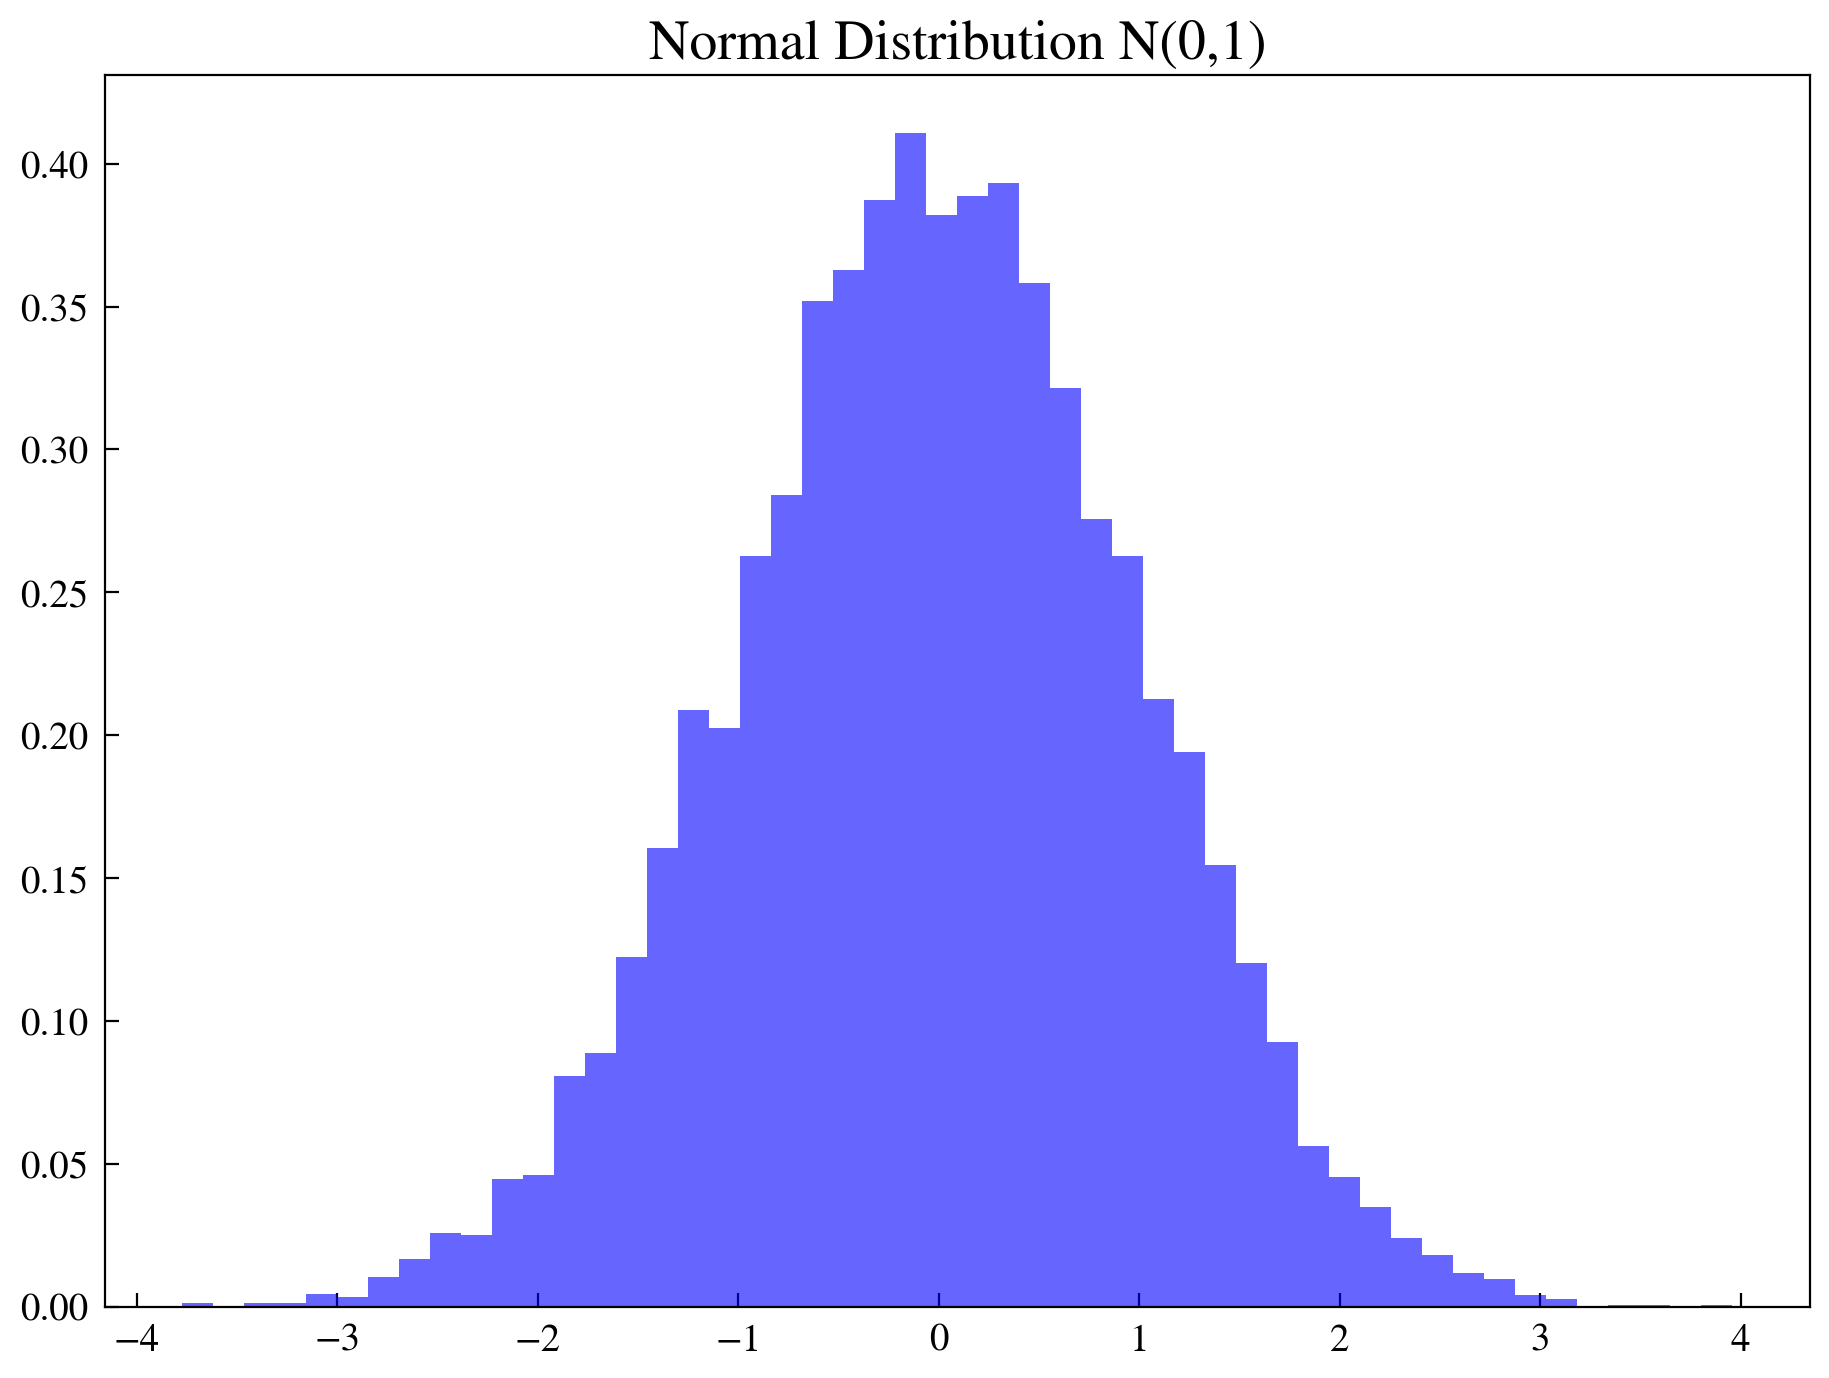

In [21]:
data = np.random.normal(loc=0, scale=1, size=10000)

plt.hist(data, bins=50, density=True, alpha=0.6, color='b')
plt.title("Normal Distribution N(0,1)")
plt.show()


### 二项分布（Binomial Distribution）

二项分布表示进行 `n` 次独立伯努利试验，每次成功概率为 `p`，成功次数的分布。

公式：
$$
P(X=k) = \binom{n}{k} p^k (1-p)^{n-k}, \quad k=0,1,...,n
$$


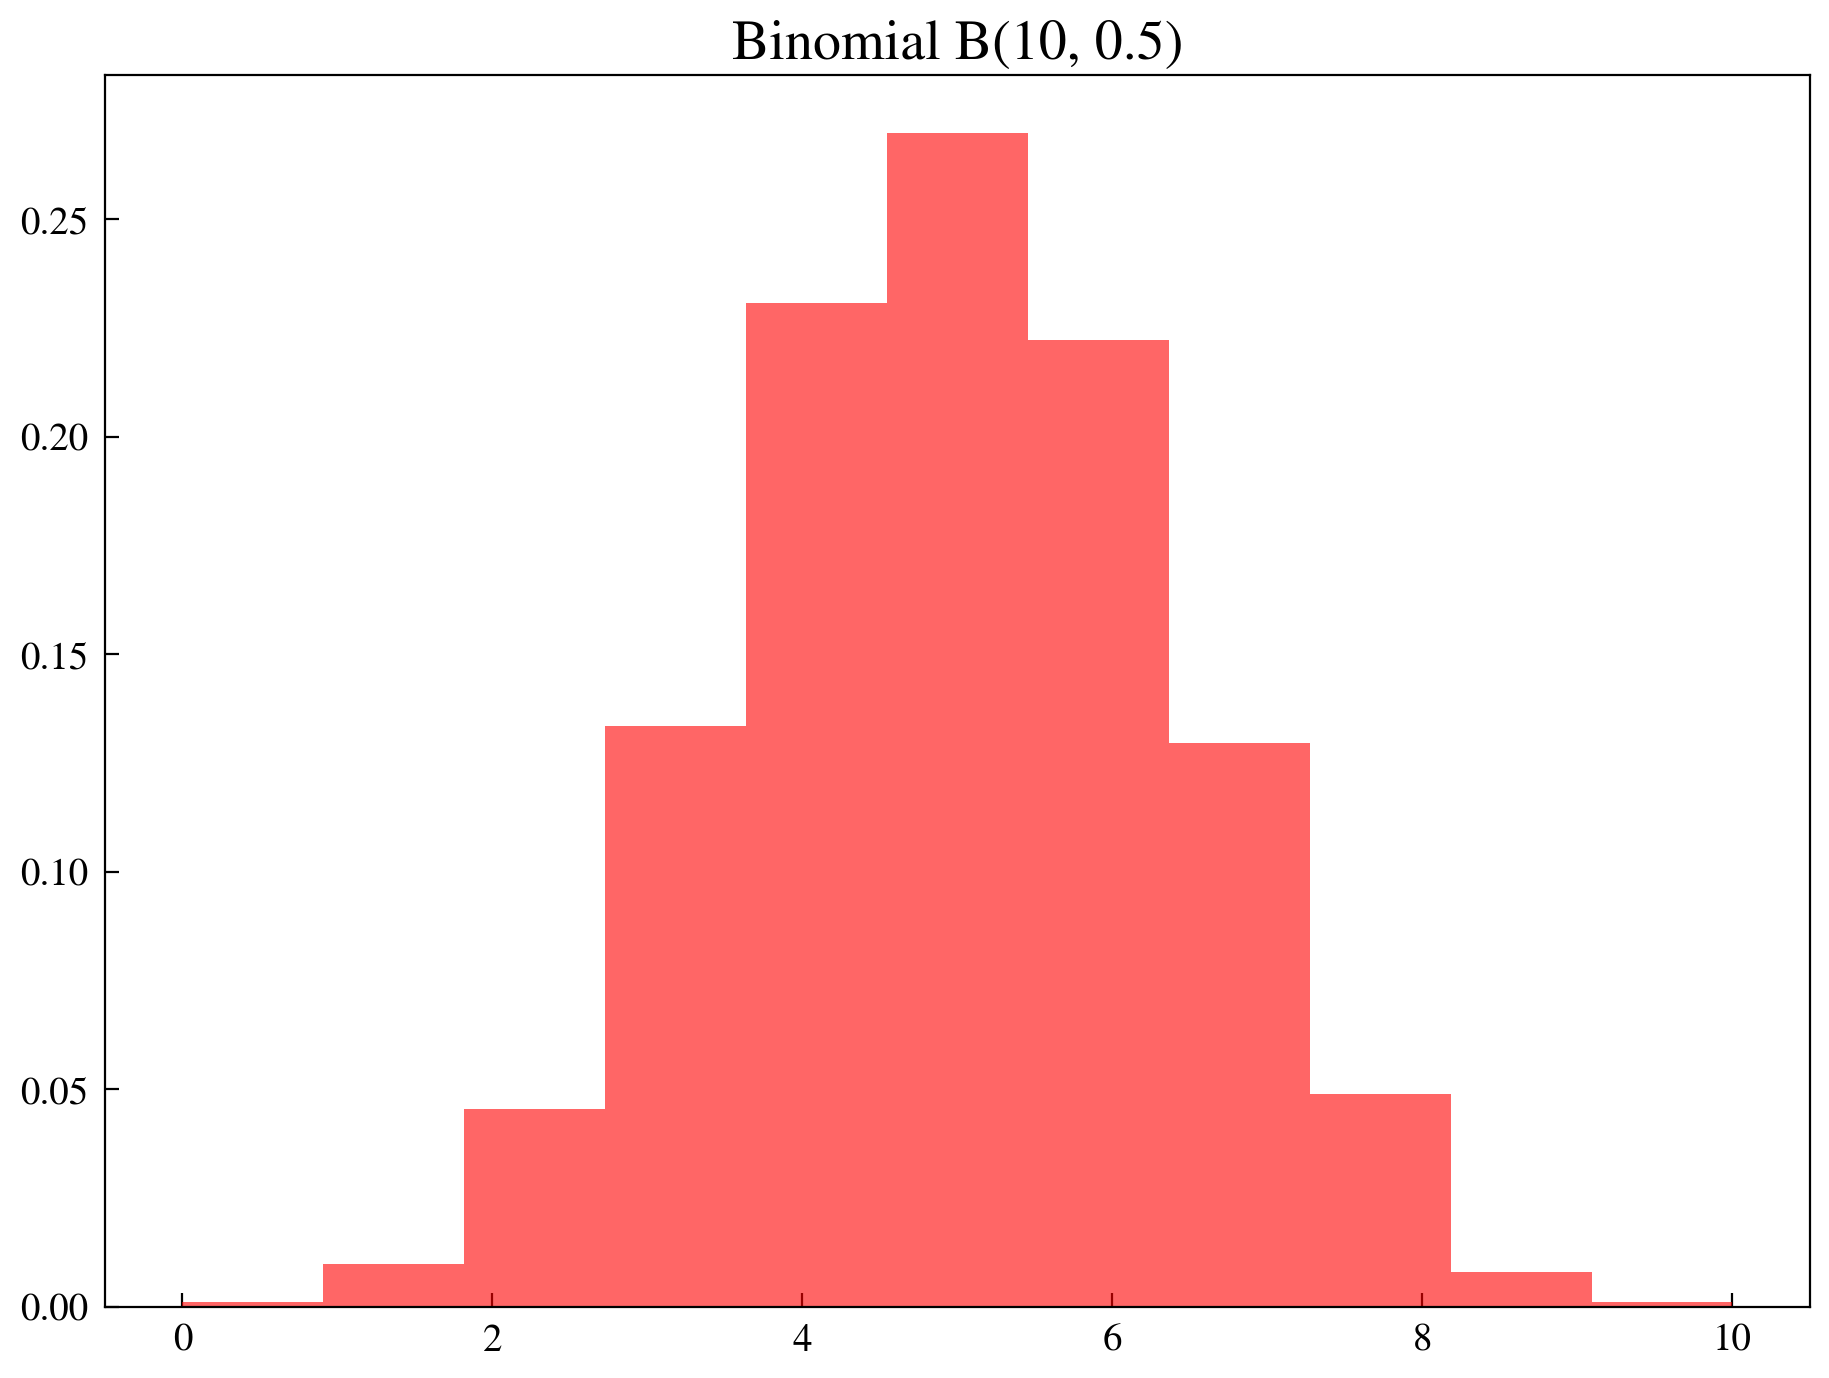

In [23]:
data = np.random.binomial(n=10, p=0.5, size=10000)

plt.hist(data, bins=11, density=True, alpha=0.6, color='r')
plt.title("Binomial B(10, 0.5)")
plt.show()


#### 4. 蒙特卡洛方法估算 π

思路：在单位正方形 `[0,1] × [0,1]` 内随机撒点，落在四分之一圆内的点数比值近似于 `pi/4`。

In [24]:
N = 100000
x = np.random.rand(N)
y = np.random.rand(N)

inside = (x**2 + y**2) <= 1
pi_est = 4 * np.mean(inside)

print("估算的 π ≈", pi_est)


估算的 π ≈ 3.13372


### 练习题

1. 生成一个均值为 5，标准差为 2 的正态分布样本（10000 个数），画出直方图，并计算其样本均值和标准差。

2. 模拟 20 次抛硬币实验，硬币正面概率为 0.3，统计 10000 次实验中正面出现次数的分布。

In [ ]:
## 你的代码



---

## NumPy 数值分析基础

NumPy 除了作为科学计算的核心工具外，还提供了许多数值分析中的常用函数，特别是在 **数值微分、数值积分、傅立叶变换** 等方面。  
这些工具能够帮助我们快速处理实验数据和模拟计算。


### 1. 数值微分：`np.gradient`

在数值计算中，微分可以用差分近似。  
NumPy 提供的 `np.gradient` 可以计算数组的梯度，即数值微分。

公式（中心差分近似）：

$$
f'(x_i) \approx \frac{f(x_{i+1}) - f(x_{i-1})}{2h}
$$


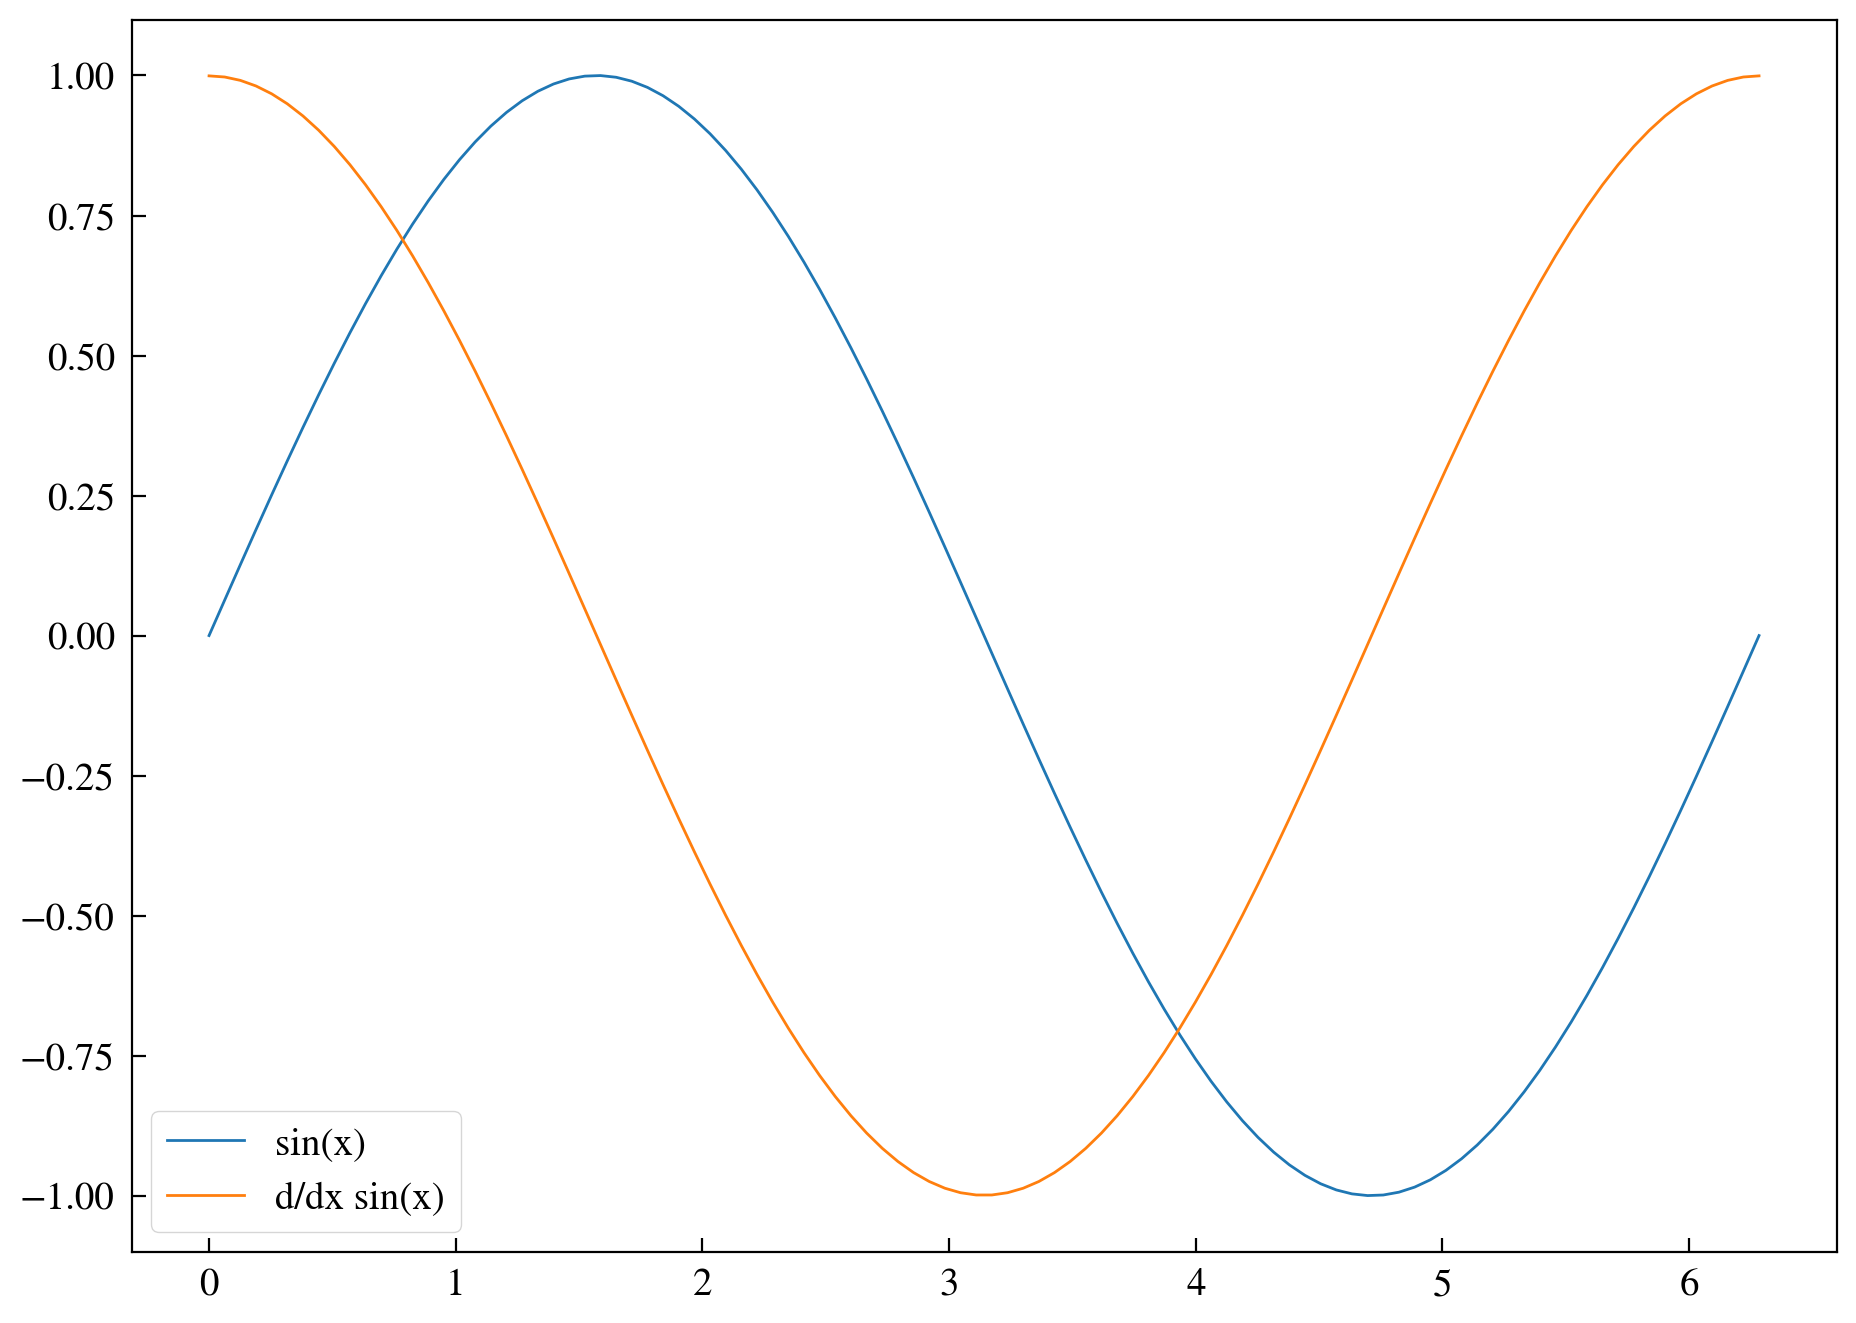

In [25]:

import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 2*np.pi, 100)
y = np.sin(x)

dy_dx = np.gradient(y, x)  # 数值微分

plt.plot(x, y, label="sin(x)")
plt.plot(x, dy_dx, label="d/dx sin(x)")
plt.legend()
plt.show()


### 2. 数值积分
#### 2.1 梯形积分：`np.trapezoid`

$$
\int_{a}^{b} f(x)\,dx \;\approx\; 
\sum_{i=0}^{n-1} \frac{f(x_i) + f(x_{i+1})}{2}\,\bigl(x_{i+1}-x_i\bigr)
$$


In [29]:
x = np.linspace(0, np.pi, 1000)
y = np.sin(x)

I = np.trapezoid(y, x)
print("积分结果:", I, "理论值:", 2.0)


积分结果: 1.999998351770852 理论值: 2.0


#### 2.2 累积积分：np.cumsum 可以计算累计和，常用于数值积分的近似累积过程。

$$
S_k \;=\; \sum_{i=0}^{k} y_i, \qquad k=0,1,\dots,n
$$


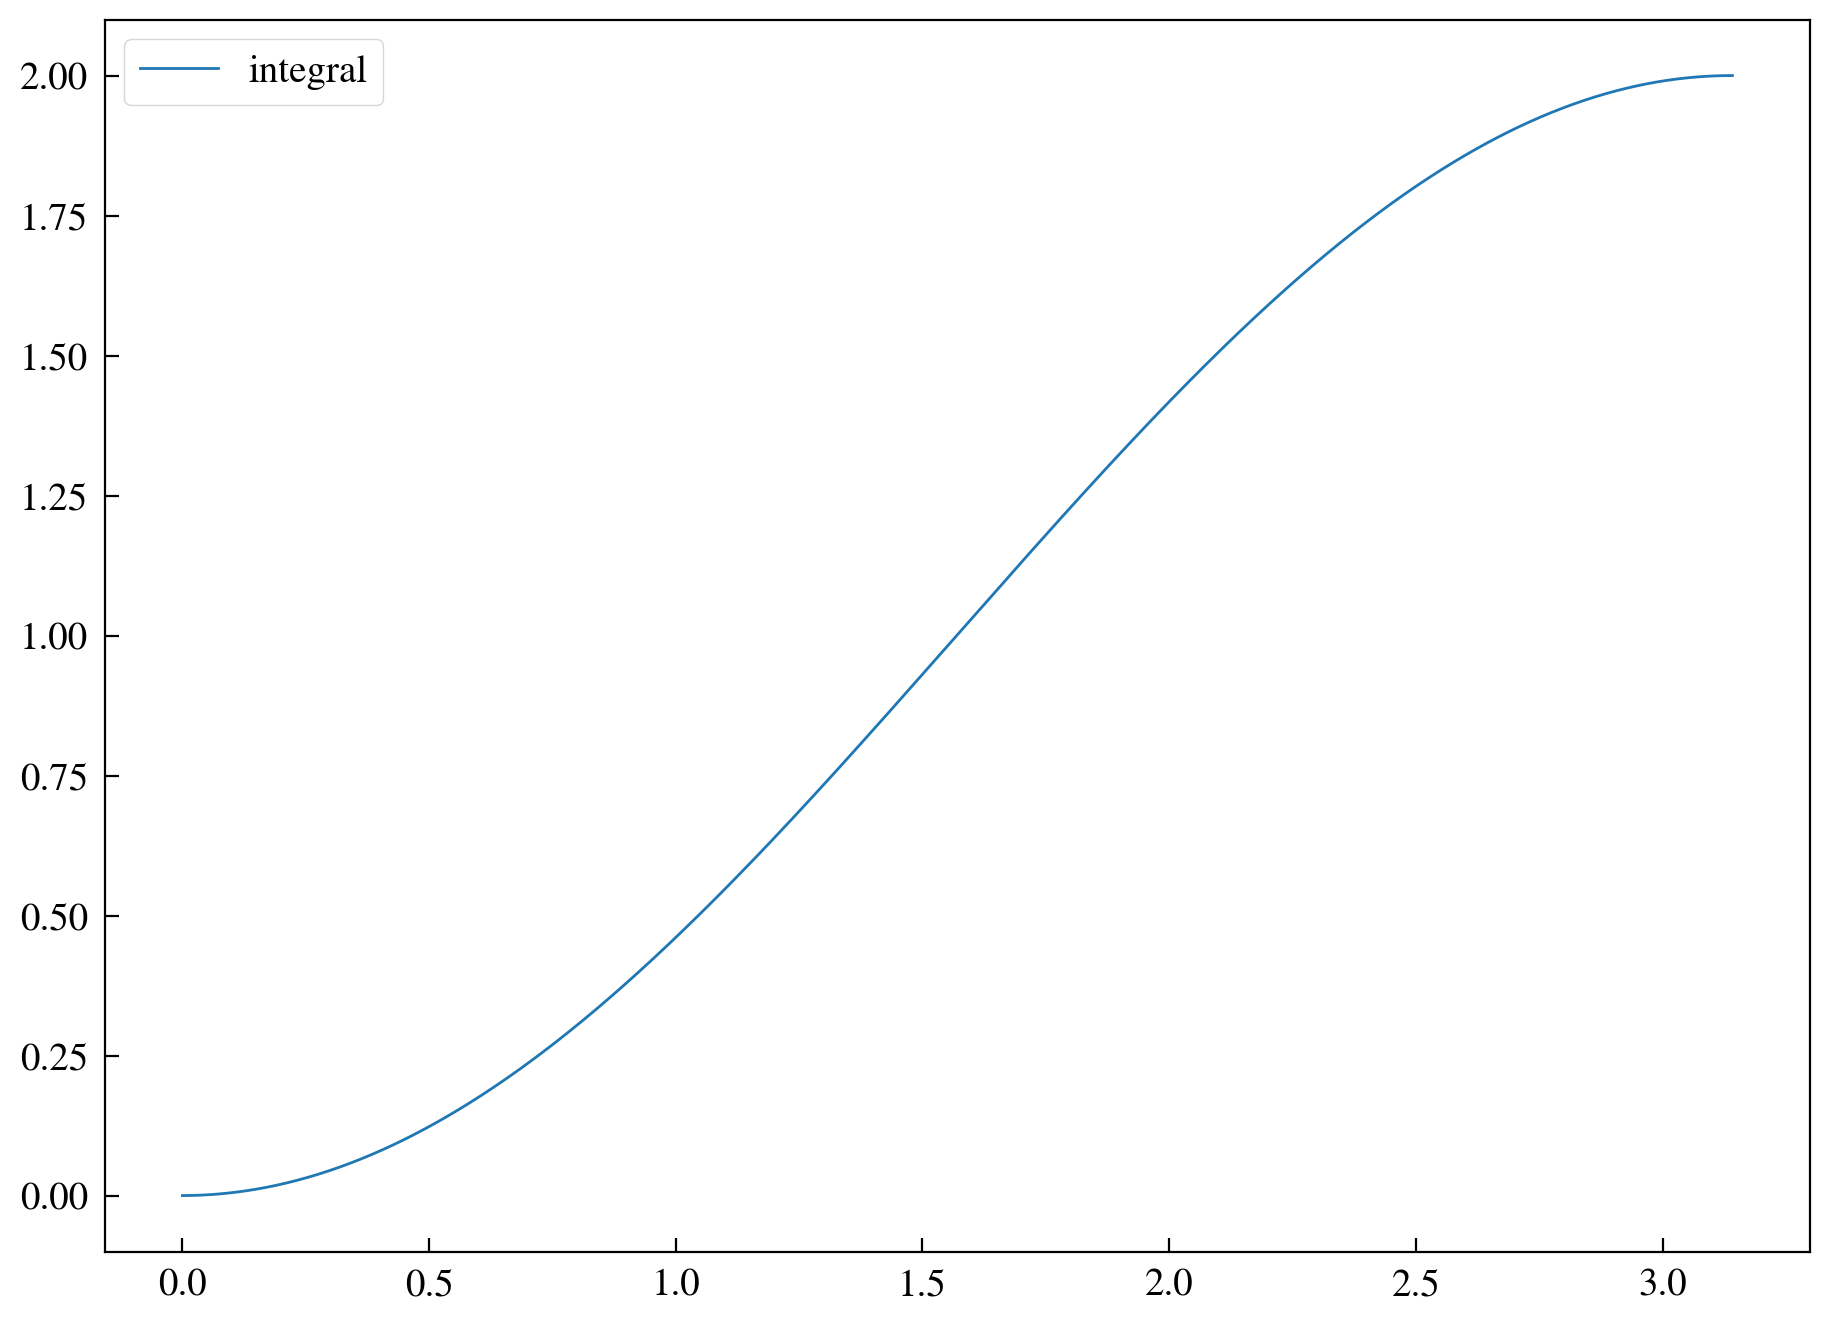

In [31]:
dx = x[1] - x[0]
cumulative_integral = np.cumsum(y) * dx

plt.plot(x, cumulative_integral, label="integral")
plt.legend()
plt.show()


### 3. 傅立叶变换：np.fft

傅立叶变换是信号处理和物理计算中的重要工具。`NumPy` 提供 `np.fft.fft` 进行离散傅立叶变换（`DFT`）。

离散傅立叶变换（Discrete Fourier transform）:
$$
X_k \;=\; \sum_{n=0}^{N-1} x_n \, e^{-\,2\pi i\, kn / N},
\qquad k=0,1,\dots,N-1
$$


逆离散傅立叶变换（Inverse Discrete Fourier Transform）:
$$
x_n \;=\; \frac{1}{N}\sum_{k=0}^{N-1} X_k \, e^{\,2\pi i\, kn / N},
\qquad n=0,1,\dots,N-1
$$

与 `np.fft.fftfreq` 对应的频率采样（采样间隔 $\Delta t$)
$$
f_k \;=\; \frac{k}{N\,\Delta t},\quad k=0,1,\dots,\left\lfloor\frac{N-1}{2}\right\rfloor; 
\qquad
f_k \;=\; -\,\frac{N-k}{N\,\Delta t},\quad k=\left\lfloor\frac{N}{2}\right\rfloor+1,\dots,N-1
$$


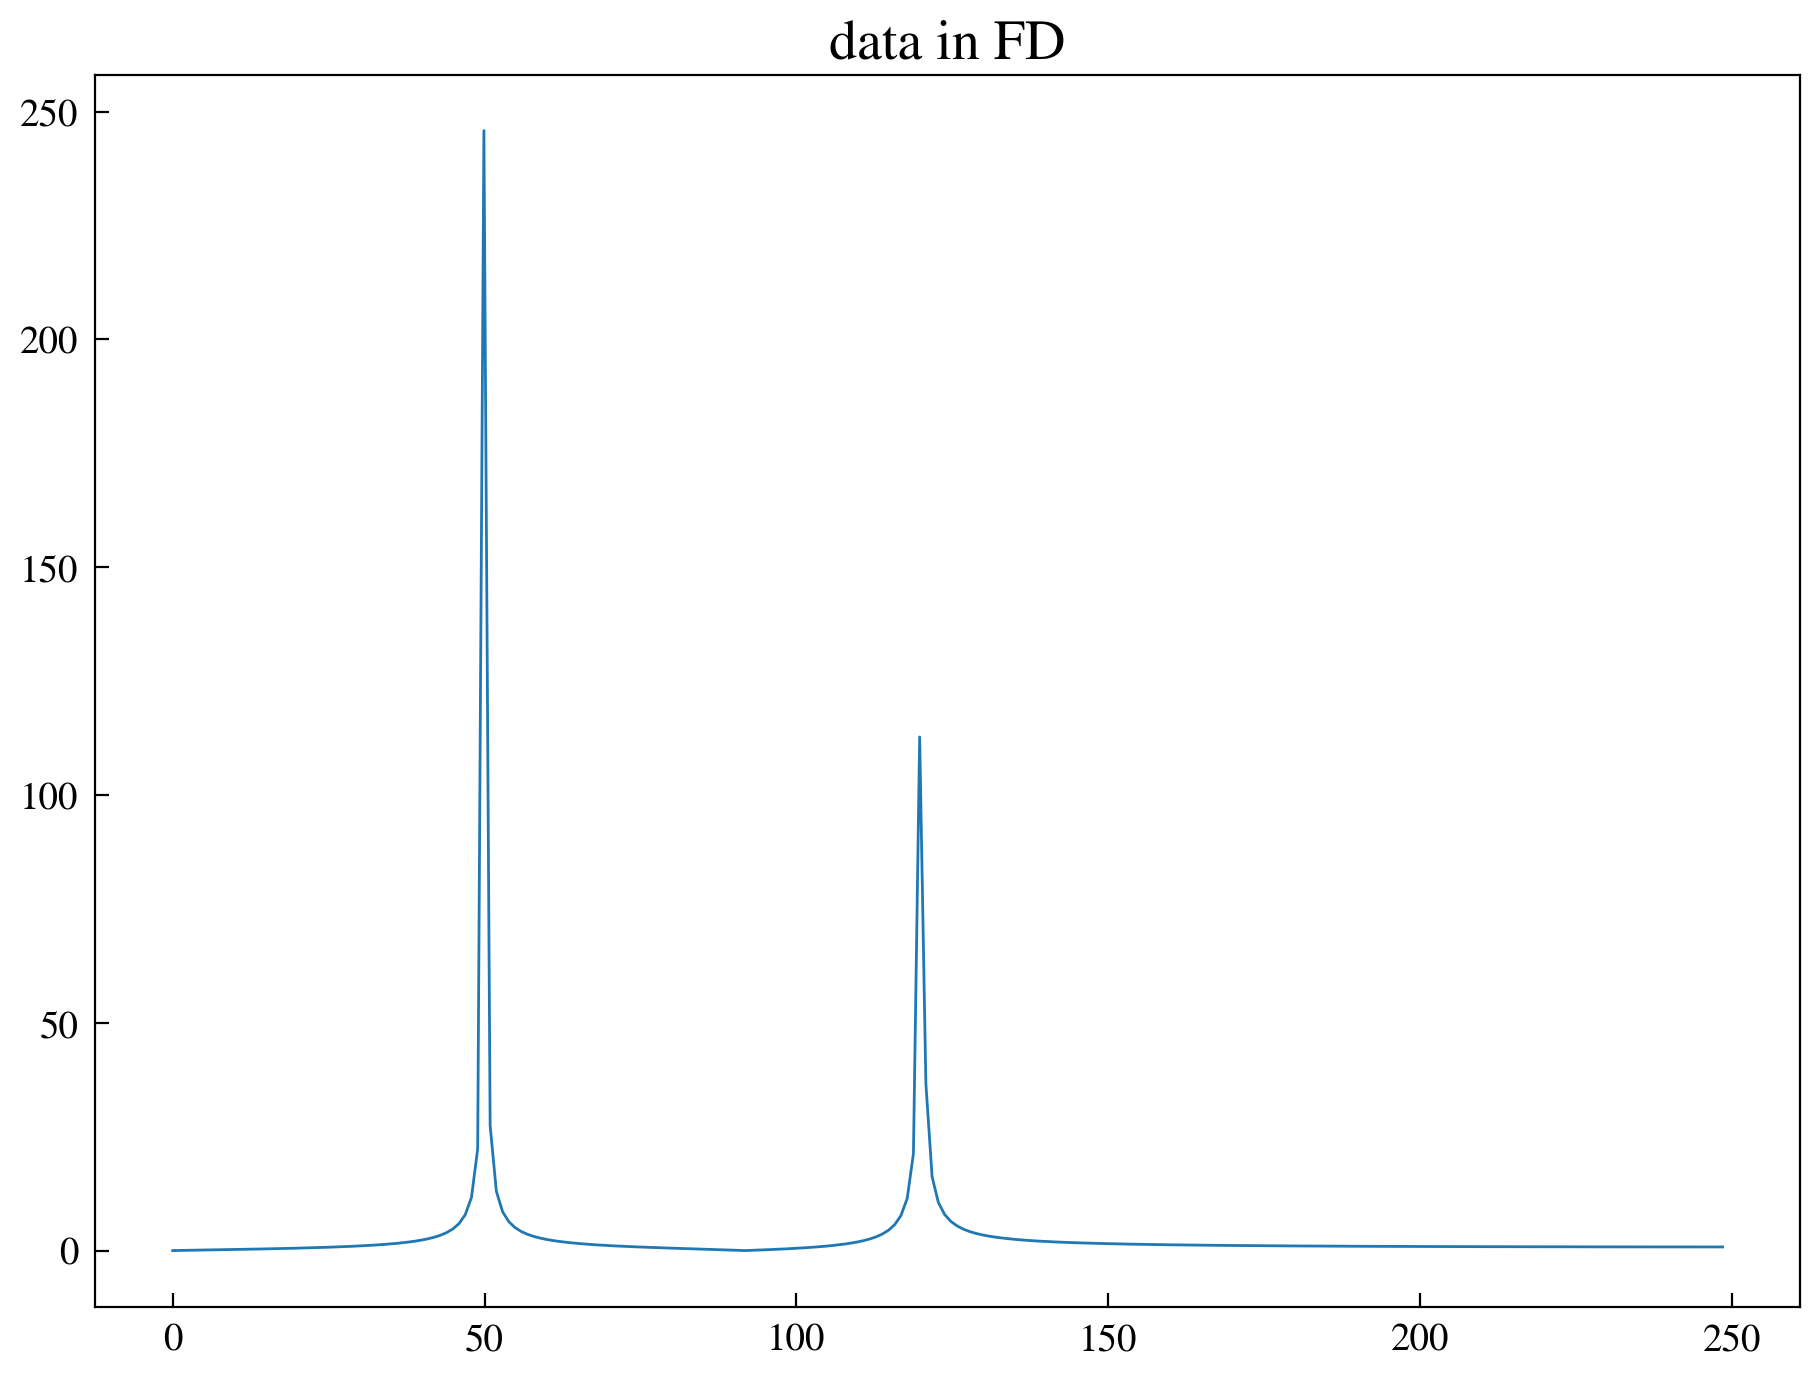

In [33]:
t = np.linspace(0, 1, 500)
signal = np.sin(2*np.pi*50*t) + 0.5*np.sin(2*np.pi*120*t)

fft_vals = np.fft.fft(signal)
freqs = np.fft.fftfreq(len(signal), d=t[1]-t[0])

plt.plot(freqs[:250], np.abs(fft_vals)[:250])  # 取前一半频率
plt.title("data in FD")
plt.show()
